# 🔵 **Parte 3: Aprendizagem Bayesiana** 🔵

* Modelo de abordagem probabilística;
* Cria uma tabela de probabilidades, considerando-se as variáveis do modelo.
* Aplicações:
  1. Filtros de spam;
  2. Detecção de emoção;
  3. Separação de documentos / conteúdo;

* **Correção Laplaciana**: adiciona observações onde na tabela haja valor nulo para evitar probabilidades nulas.

## **Exemplo de tabela**

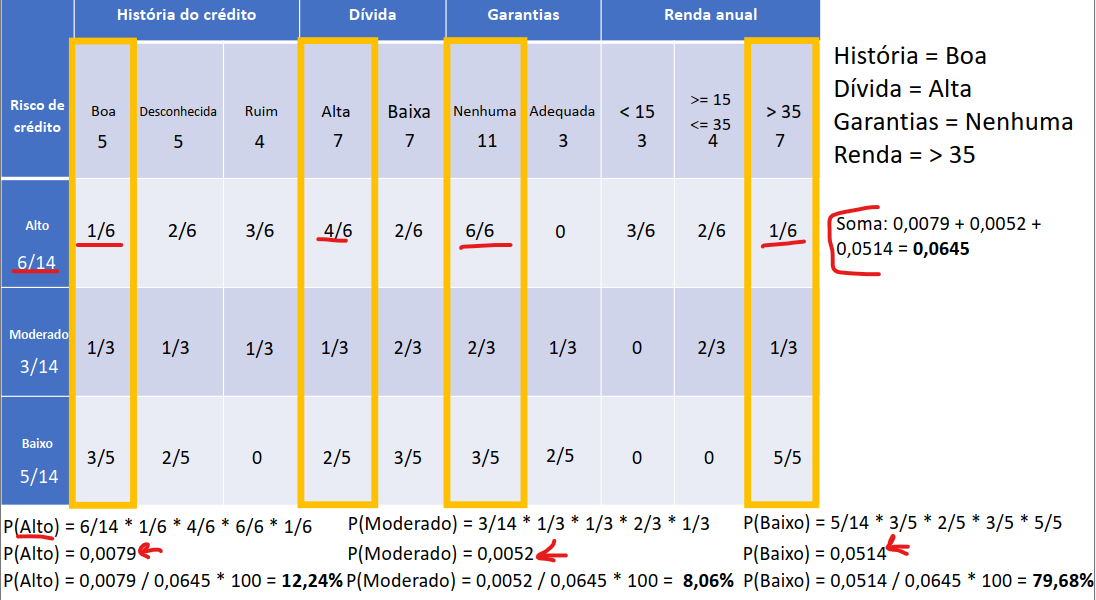



## **Exemplo de radius**

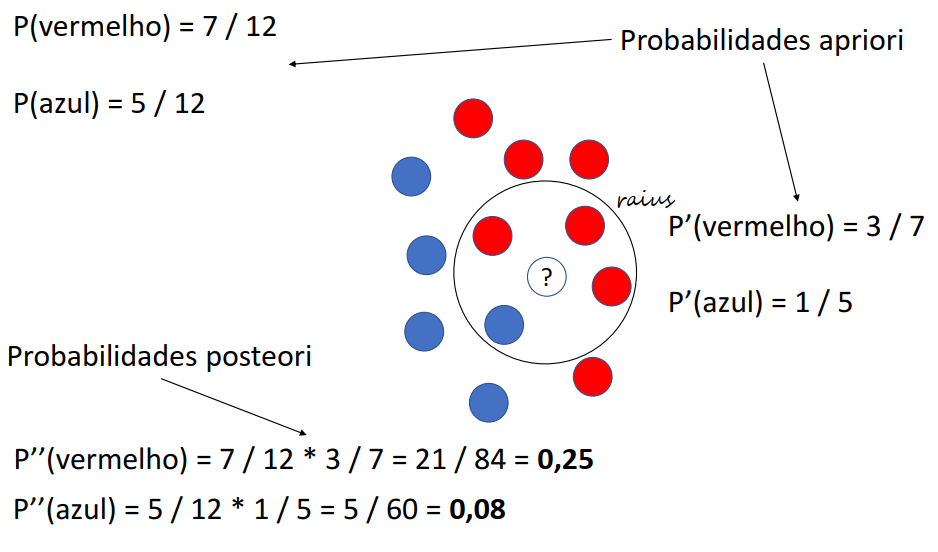

## **Vantagens**
* Alta dimensão
* Rápido e simples
* Bom para pequenas bases

## **Desvantagem**
* Admite que as variáveis são independentes

# 🔴 Importação das bibliotecas básicas

In [ ]:
!pip -q install plotly #Para visualização de gráficos mais sofisticados

In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 🔴 Naïve Bayes


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.naive_bayes import GaussianNB

## **Base risco de crédito**

Base pequena, para fins de exemplificação.

### _Importando dados_

In [ ]:
base_risco_credito = pd.read_csv('/content/3. risco_credito.csv')

In [ ]:
base_risco_credito

#Shape = [14,5]

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


### _Dividindo os dados (X e Y)_

In [ ]:
# Criando o vetor de variáveis explicativas
X_risco_credito = base_risco_credito.iloc[:, 0:4].values

In [ ]:
# Criando o vetor da variável dependente
Y_risco_credito = base_risco_credito.iloc[:, 4].values

### _Ajustando variáveis categóricas_

In [ ]:
#Criando objeto
label_enconder = LabelEncoder()

In [ ]:
#Criando cópia
X_risco_credito_labeled = X_risco_credito.copy()

In [ ]:
X_risco_credito_labeled[:,0] = label_enconder.fit_transform(X_risco_credito[:,0])
X_risco_credito_labeled[:,1] = label_enconder.fit_transform(X_risco_credito[:,1])
X_risco_credito_labeled[:,2] = label_enconder.fit_transform(X_risco_credito[:,2])
X_risco_credito_labeled[:,3] = label_enconder.fit_transform(X_risco_credito[:,3])

In [ ]:
X_risco_credito_labeled

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

### _Salvando dados_

In [ ]:
with open('risco_credito.pkl', mode = 'wb') as f:
  pickle.dump([X_risco_credito_labeled, Y_risco_credito], f)

### _Aplicando modelo Naive Bayes_ 🌟
* fit
* predict
* .class_prior
* .class_count_
* .classes

In [ ]:
#Criando o objeto
naive_risco_credito = GaussianNB()

In [ ]:
#Treinando o modelo
naive_risco_credito.fit(X_risco_credito_labeled, Y_risco_credito)

GaussianNB()

* Fazendo previsões

história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)

história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)

In [ ]:
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [ ]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
# Quais são as classes do modelo?
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
# Quais são as probabilidades de cada classe?
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

In [ ]:
# Quantas observações temos em cada classe?
naive_risco_credito.class_count_

array([6., 5., 3.])

## **Base credit data** - 93.80% de acurária

### _Importando dados_

In [ ]:
# Abrindo os dados já tratados com pickle
with open('credit.pkl', mode = 'rb') as f: #Mode Read
  X_credit_treino, X_credit_teste, Y_credit_treino, Y_credit_teste = pickle.load(f)

In [ ]:
# Shape dos vetores de treino
X_credit_treino.shape, Y_credit_treino.shape

((1500, 3), (1500,))

In [ ]:
# Shape dos vetores de teste
X_credit_teste.shape, Y_credit_teste.shape

((500, 3), (500,))

### _Criando modelo_

In [ ]:
#Criando objeto
naive_credito = GaussianNB()

In [ ]:
# Treinando
naive_credito.fit(X_credit_treino, Y_credit_treino)

GaussianNB()

In [ ]:
# Testando
previsoes = naive_credito.predict(X_credit_teste)

### _Avaliando o modelo_ ⭐⭐
1. Accuracy Score(y_true, y_predic)
2. Confusion Matrix
3. Classification Report (será mais detalhado adiante no curso)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
accuracy_score(Y_credit_teste, previsoes)

0.938

Linha: realidade

Colunas: previsão do modelo

In [ ]:
confusion_matrix(Y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.938

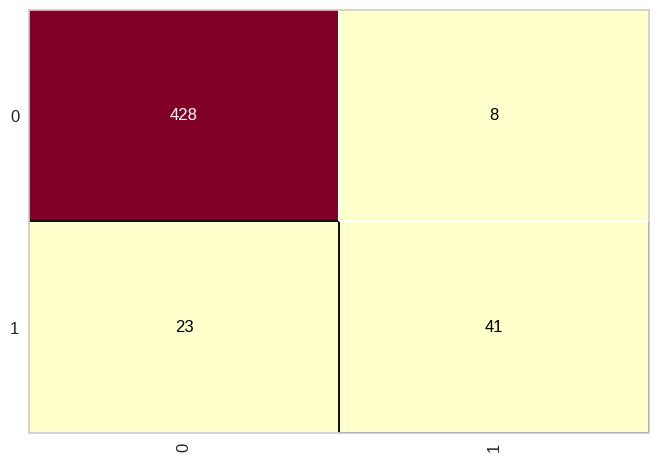

In [ ]:
cm = ConfusionMatrix(naive_credito)
cm.fit(X_credit_treino, Y_credit_treino)
cm.score(X_credit_teste, Y_credit_teste)

In [ ]:
print(classification_report(Y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



## **Base census** - 47.67%

### _Importando dados_

In [ ]:
#Abrindo a base de dados
with open('census.pkl', mode = 'rb') as f:
  X_census_treino, X_census_teste, Y_census_treino, Y_census_teste = pickle.load(f)

In [ ]:
# Shape dos vetores de treino
X_census_treino.shape, Y_census_treino.shape

((27676, 108), (27676,))

In [ ]:
# Shape dos vetores de teste
X_census_teste.shape, Y_census_teste.shape

((4885, 108), (4885,))

### _Criando o modelo_

In [ ]:
# Criando o objeto
naive_census = GaussianNB()

# Gerando o ajuste
naive_census.fit(X_census_treino, Y_census_treino)

# Gerando previsões
previsoes_census = naive_census.predict(X_census_teste)

### _Avaliando o modelo_

In [ ]:
accuracy_score(Y_census_teste, previsoes_census)

0.4767656090071648

0.4767656090071648

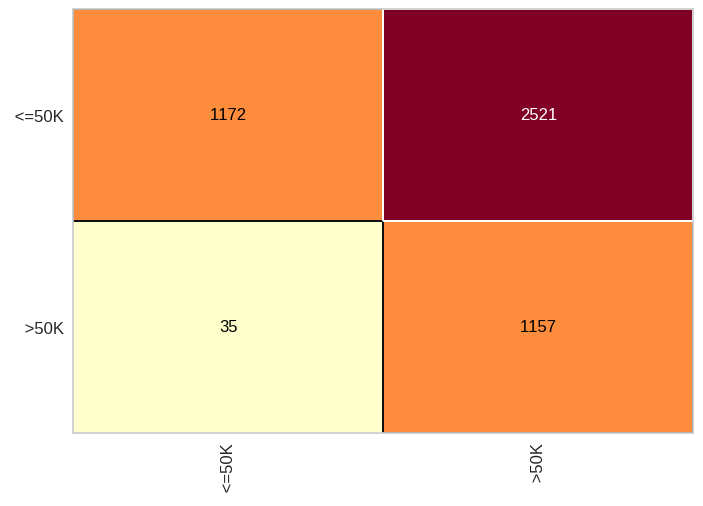

In [ ]:
cm = ConfusionMatrix(naive_census)
cm = cm.fit(X_census_treino, Y_census_treino)
cm.score(X_census_teste, Y_census_teste)

In [ ]:
print(classification_report(Y_census_teste, previsoes_census))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

